#Online Retail Customer Segmentation Project

In this Online Retail Customer Segmentation or Market Segmentation project by data pre-processing and KMeans Clustering technique ,we will divide the whole data of customers on the basis of RMF i.e. Recency, Monetary and Frequency and we will also visualize these groups on the basis of these terms.
        But Before starting the Project directly first know some basic terms-

Customer Segmentation or Market Segmentation

We can say that Customer Segmentation or Market Segmentation is methodology or marketing practice through which we divide our customer group into various similar sub groups such as on the basis of spending amount, frequency of visit,behaviour , age, gender,e.t.c.
This helps the companies to know
Which group of customers are loyal,
Which group can spend more money,
Which group visit them infrequently,
Which group of customers they are loosing.

Through this companies tries to target the sub groups of customers in retaining them on the basis of their needs and desires by executing various marketing campaigns such as providing special offers, discounts etc.In this project we are dividing our customers on the basis of 3 factors,which is RFM (Recency,Frequency,Monetary)


Recency:- It represents how recently a customer purchased a product.

Frequency:- It represents how often a customer purchased a product. The more frequent will be the better score.

Monetary:- It represents how much an customer spends.

In [ ]:
#importing libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read csv data file
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# Checking the first few rows and dimension of the dataset
df = pd.read_csv(io.BytesIO(uploaded['OnlineRetail (3) (2).csv']),encoding = 'unicode_escape')
print('Shape of Data',df.shape)
df.head()

NameError: ignored

In [ ]:
#getting all the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#viewing some basic details of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By using the df.describe() function we came to know that our minimum quantity is in negative and we all know that a quantity will never be in Negative. So, we have to remove this redundancy in order to get better accuracy because redundancy can cause miss grouping of data.

# Data Preprocessing

In [ ]:
#removing the redundancy

df=df.loc[df["Quantity"] >0]
df.shape

(531285, 8)

Earlier it was 541909 rows and after removing redundancy it is 531285 rows now,it means removed 10624 rows had redundancy.

In [ ]:
df.describe() #after removing negatives

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


we can see that Invoice date is object type now we have to convert this into datetime for calculating all the values.

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #converting into datetime
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [ ]:
#checking no of unique category  in every column
df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19052
UnitPrice       1293
CustomerID      4339
Country           38
dtype: int64

#Exploratory Data Analysis

In [ ]:
df.Country.value_counts().reset_index()

,index,Country
0,United Kingdom,486286
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1967
8,Portugal,1501
9,Australia,1185


In [ ]:
#created a column of sale
df['Sales'] =df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Calculating MONETARY

It represents how much an customer spends,means sum of spent money(per unit price) over number of quantity.

In [ ]:
# calculating monetary value by grouping customer with their customer id and total no. of sales.
monetary =df.groupby("CustomerID").Sales.sum()
monetary = monetary.reset_index()
monetary
#monetary.head(20).plot(kind='bar')


,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


Calculating FREQUENCY:

It represents how often a customer purchased a product. The more frequent will be the better score,it will get by the count of invoice number.

In [ ]:
frequency=df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency
#frequency.head(20).plot(kind='line')

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


Calculating RECENCY:

It represents how recently a customer purchased a product and it will get by deciding the reference date for analysis and we will
define the reference date as one day before the last transaction.

In [ ]:
#calculating the last date of InvoiceDate
ReferenceDate = max(df.InvoiceDate)
ReferenceDate

Timestamp('2011-12-09 12:50:00')

In [ ]:
#adding one to LastDate
ReferenceDate = ReferenceDate + pd.DateOffset(days=1)
ReferenceDate

Timestamp('2011-12-10 12:50:00')

In [ ]:
# We will construct LastPurchaseDate variable as number of days before the reference date when a customer last made a purchase.
df["LastPurchaseDate"] = ReferenceDate - df.InvoiceDate

In [ ]:
recency = df.groupby("CustomerID").LastPurchaseDate.min()
recency = recency.reset_index()
recency

,CustomerID,LastPurchaseDate
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
...,...,...
4334,18280.0,278 days 02:58:00
4335,18281.0,181 days 01:57:00
4336,18282.0,8 days 01:07:00
4337,18283.0,4 days 00:48:00


In [ ]:
#combining all dataframes into one


rmf = monetary.merge(frequency, on = "CustomerID")
rmf = rmf.merge(recency, on = "CustomerID")
rmf.columns = ["CustomerID", "Monetary", "Frequence", "Recency"]
rmf

,CustomerID,Monetary,Frequence,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


In [ ]:
#dropping customer id and storing it into RMF1
RMF1 = rmf.drop("CustomerID",axis =1)
RMF1.Recency = RMF1.Recency.dt.days
RMF1

,Monetary,Frequence,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


Now we will perform analysis of data using KMeans algorithm.

In [ ]:
RMF1 = pd.DataFrame(RMF1 , columns=[ "Monetary", "Frequence", "Recency"])
RMF1.head()

,Monetary,Frequence,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310


Model Building

In [ ]:
from sklearn.cluster import KMeans


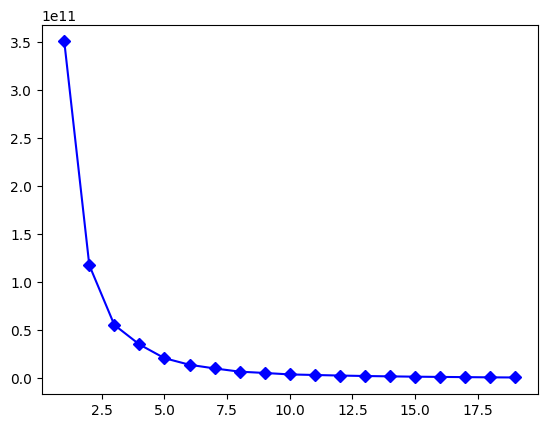

In [ ]:
clusters = []
for i in range(1,20):
    km = KMeans(n_clusters = i)
    km.fit_predict(RMF1)
    clusters.append(km.inertia_)

plt.plot(range(1,20),clusters,marker='D',c='blue')
plt.show()


In the KMean algorithm we are using Elbow method to find the no. of clustering groups,and after performing of this algo we came to know that number of cluster here is 5.Now we will buid the model of that.

In [ ]:
model = KMeans(n_clusters=5)
km_pred = model.fit_predict(RMF1)
km_pred


array([2, 3, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
RMF1["ClusterID"] = km_pred
RMF1

,Monetary,Frequence,Recency,ClusterID
0,77183.60,1,326,2
1,4310.00,182,2,3
2,1797.24,31,75,3
3,1757.55,73,19,3
4,334.40,17,310,3
...,...,...,...,...
4334,180.60,10,278,3
4335,80.82,7,181,3
4336,178.05,12,8,3
4337,2094.88,756,4,3


In [ ]:
sns.boxplot(x='ClusterID', y='Frequence', data=RMF1)

In [ ]:
sns.boxplot(x='ClusterID', y='Recency', data=RMF1)

In [ ]:
sns.boxplot(x='ClusterID', y='Monetary', data=RMF1)

In [ ]:
cluster1 = RMF1[km_pred == 0]
cluster1

,Monetary,Frequence,Recency,ClusterID
10,6207.67,131,33,0
12,6372.58,248,58,0
50,11072.67,109,79,0
66,7956.46,294,26,0
69,6487.45,236,36,0
...,...,...,...,...
4214,5653.82,1279,11,0
4229,8438.34,159,18,0
4253,7561.68,189,15,0
4292,6484.54,272,5,0


In [ ]:
km_cluster_sale =RMF1.groupby("ClusterID").Monetary.mean()
km_cluster_Recency =RMF1.groupby("ClusterID").Recency.mean()
km_cluster_Frequence =RMF1.groupby("ClusterID").Frequence.mean()

In [ ]:
km_cluster_sale,km_cluster_Recency,km_cluster_Frequence

(ClusterID
 0     10022.790242
 1    149828.502000
 2     51858.727500
 3      1049.274575
 4    269931.660000
 Name: Monetary, dtype: float64,
 ClusterID
 0    20.526570
 1     8.800000
 2    37.250000
 3    96.622043
 4     1.500000
 Name: Recency, dtype: float64,
 ClusterID
 0     354.096618
 1    1626.600000
 2    1173.375000
 3      69.695440
 4    1255.500000
 Name: Frequence, dtype: float64)

Now our Data Visualization part starts

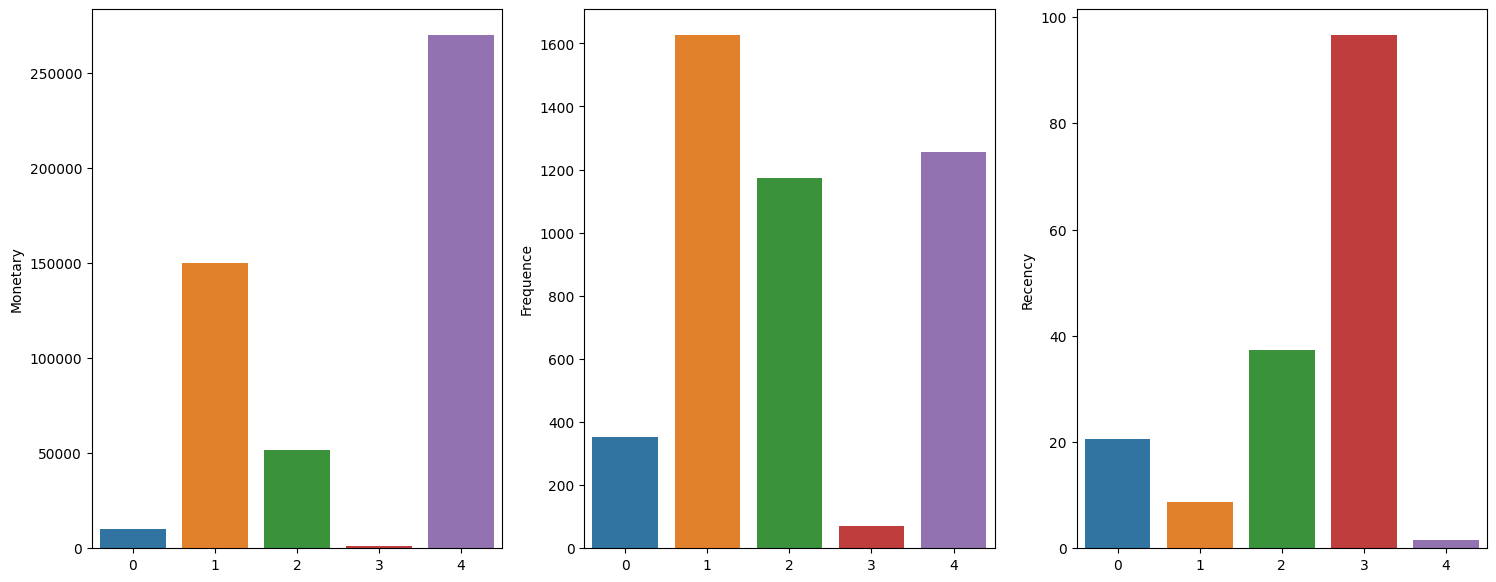

In [ ]:
#first we are ploting bar chart

fig, axs = plt.subplots(1,3, figsize = (18, 7))


sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])
plt.show()

now we are ploting pie-chart

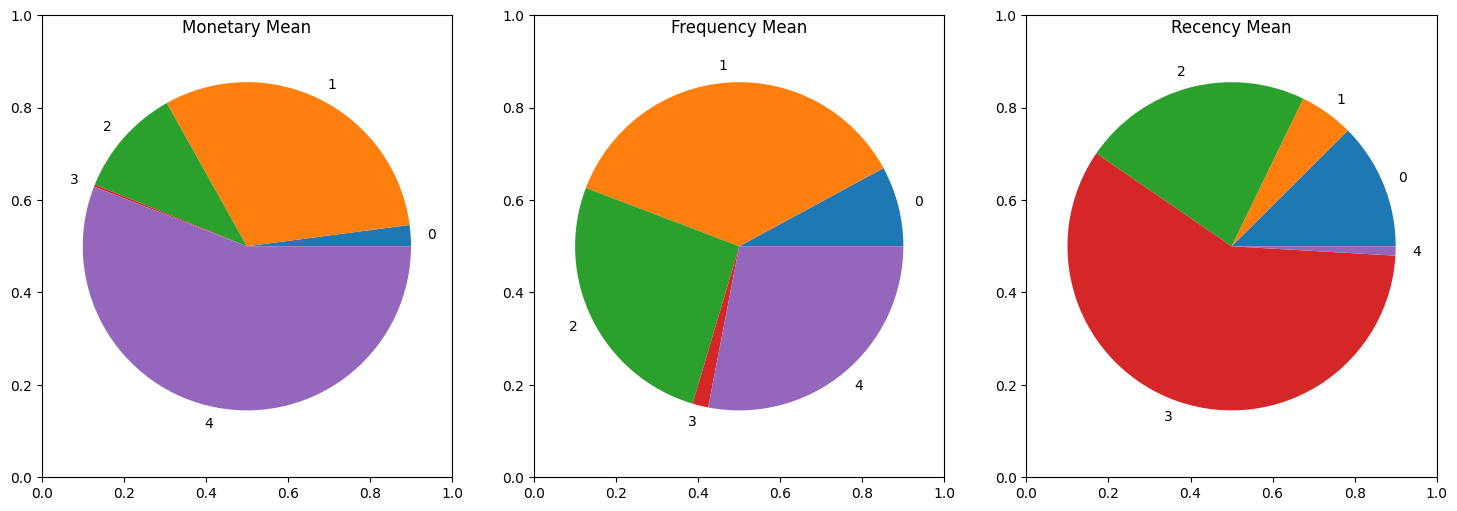

In [ ]:
fig,axis = plt.subplots(1,3, figsize =(18,6))

ax1 =fig.add_subplot(1,3,1)
plt.title("Monetary Mean")
ax1.pie(km_cluster_sale, labels =[0,1,2,3,4])

ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence, labels =[0,1,2,3,4])

ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels =[0,1,2,3,4])
plt.show()

Inferences:

From the above bar chart and pie chart, we can easily understand our 5 groups according to Recency mean,Frequency mean and Monetary mean.

Group 4 is the group of customers who spends maximum amount of money and also has a good frequency and low recency rate.Group 1 are the customers whose frequency rate is maximum and monetary value is also good and recency rate is also quite good, whereas Group 3 is the group of customers who has maximum recency rate means they have not purchased anything from the past,has low frequency also and didn't spend money(very low monetary rate)

Based on these results indicate that cluster 4 is a high value customers then cluster 1 customers taking place.Cluster 2 is middle value customers, and Cluster 0 and then cluster 3 are low value customers.